<img src="escudo_utfsm.gif" style="float:right;height:100px">
<img src="IsotipoDIisocolor.png" style="float:left;height:100px">
<center>
    <h1> ILI286 - Computación Científica II</h1>
    <h1> Tarea 3: PDE Inpaiting </h1> 
    <h3>[V]íctor [T]orres [V]aras 201173076-3</h3>
</center>
<p>
<center>Febrero 2020 - v1.0 </center>
</p>

---

In [1]:
import numpy as np
import scipy as sp
import scipy.optimize 

import imutils
import matplotlib.pyplot as plt
from numpy import linalg
from matplotlib.image import imread
from PIL import Image
from copy import deepcopy


In [67]:
#Código obtenido del Repositorio de Jupyter Notebook del curso para euler y RK orden 4
def euler_ode(y,m,x,f,h):
    return y+h*f(m,x)

def euler_ode_dinamico(r,f,h):
    #print("aca w",w)
    w1=r[:]
    w=r[:]
    w[0] = w1[0]+h*w1[1]
    w[1] = w1[1]+h*f(w1)
    #print("aca w nuevo",w)
    return w


def RK4_ode(y,m,x,f,h):
    k1=f(m,x)
    k2=f(m,x+(h/2.0)*k1)
    k3=f(m,x+(h/2.0)*k2)
    k4=f(m,x+h*k3)
    return y+(h/6.0)*(k1+2.0*k2+2.0*k3+k4)

Ejercicio 3.28 EDO 

In [119]:
#Sistema Dinamico
#Lo primero que hacemos es definir la funcion que usaremos, en este caso el Sistema dinamico 
def funcion(w):
    m=1
    c=2
    k=50
    fuerza = -(w[1]*c + k*w[0])/m
    return fuerza
#La funcion la usaremnos para luego evaluar Euler
#Creamos el algoritmo para resolver
def solver_edo(y0,v0,N,T):
    h=T/N
    y=y0
    v=v0
    t = np.zeros((N,2))#2 es la cantidad de w que se tiene y N es la cantidad de puntos a iterar
    #t[1,0]=y
    #t[1,1]=v
    t[0,]=[y,v]
    for j in range(1,N):
        #print("-----iteracion j",j)
        #print("valor t",t)
        r= deepcopy(t[j-1])
        t[j,] = euler_ode_dinamico(r,funcion,h) 
        #print("valor segundo t",t)
    return t

In [175]:
p = solver_edo(2,0.1,50,10)
print(p)

[[ 2.00000000e+00  1.00000000e-01]
 [ 2.02000000e+00 -2.01400000e+01]
 [-2.00800000e+00  7.99600000e+00]
 [-4.08800000e-01  8.88560000e+00]
 [ 1.36832000e+00 -8.35184000e+00]
 [-3.02048000e-01 -1.99062400e+00]
 [-7.00172800e-01  5.80735360e+00]
 [ 4.61297920e-01 -1.12856704e+00]
 [ 2.35584512e-01 -3.03298534e+00]
 [-3.71012557e-01  1.89033436e+00]
 [ 7.05431552e-03  1.06365746e+00]
 [ 2.19785808e-01 -1.55966360e+00]
 [-9.21469125e-02 -1.43290364e-02]
 [-9.50127197e-02  9.41529776e-01]
 [ 9.32932354e-02 -3.68014488e-01]
 [ 1.96903377e-02 -4.17712070e-01]
 [-6.38520763e-02  3.87893521e-01]
 [ 1.37266279e-02  9.54698336e-02]
 [ 3.28205946e-02 -2.70924046e-01]
 [-2.13642146e-02  5.10877183e-02]
 [-1.11466709e-02  1.42119340e-01]
 [ 1.72771971e-02 -8.75003671e-02]
 [-2.22876290e-04 -5.02714574e-02]
 [-1.02771678e-02  7.26088032e-02]
 [ 4.24459288e-03  1.11935313e-03]
 [ 4.46846351e-03 -4.40130232e-02]
 [-4.33414113e-03  1.69335974e-02]
 [-9.47421651e-04  1.96343749e-02]
 [ 2.97945334e-03 -1

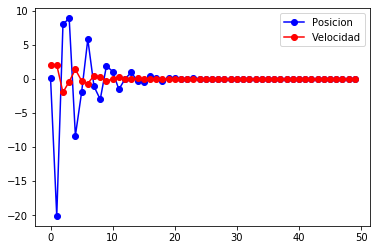

In [176]:
plt.plot(p[:,1] ,'-bo', label='Posicion')
plt.plot(p[:,0] ,'-ro', label='Velocidad')
plt.legend(loc='upper right')

Ejercicio 4.18 EDP
